

## **Motivation**:

1. Predicting Thermodynamic Stability (IS2RES)
The primary chemical goal is to predict the Relaxed Energy (**y_relaxed**) of the system.
    * *Purpose*: This value is used to calculate Adsorption Energy
<br>

2. Predicting Atomic Geometry (IS2RES)
The structural goal is to predict the Relaxed Positions (**pos_relaxed**) of the atoms.
    * *Purpose*: In the real world, atoms move to find a "local energy minimum". This task challenges models to predict exactly where the atoms will settle (the equilibrium structure) given only their starting positions.

* * *
## **Dataset information**
Each Data object includes the following information for each corresponding system (assuming K atoms):

* `sid` - [1] System ID corresponding to each structure
* `edge_index` - [2 x  J] Graph connectivity with index 0 corresponding to neighboring atoms and index 1 corresponding to center atoms. J corresponds to the total edges as determined by a nearest neighbor search.
* `atomic_numbers` - [K x 1] Atomic numbers of all atoms in the system
* `pos` - [K x 3] Initial structure positional information of all atoms in the system (x, y, z cartesian coordinates)
* `natoms` - [1] Total number atoms in the system
* `cell` -  [3  x 3] System unit cell (necessary for periodic boundary condition (PBC) calculations)
* `cell_offsets` - [J x 3] offset matrix where each index corresponds to the unit cell offset necessary to find the corresponding neighbor in  `edge_index`. For example,  `cell_offsets[0, :] = [0,1,0]` corresponds to `edge_index[:, 0]= [1,0]` representing node 1 as node 0’s neighbor located one unit cell over in the +y direction.
* `tags` - [K x 1] Atomic tag information: 0 - Fixed, sub-surface atoms, 1 - Free, surface atoms 2 - Free, adsorbate atoms

Train/Val LMDBs additionally contain the following attributes:

* `y_init` - [1] Initial structure energy of the system
* `y_relaxed` - [1] Relaxed structure energy of the system (Energy distribution)
* `pos_relaxed` - [K x 3] Relaxed structure positional information of all atoms in the system (x, y, z cartesian coordinates)


*This LMDB file requires no additional processing and is ready to be used directly with the repository’s Datasets and DataLoaders.*


* * *
## Libraries & Modules

In [23]:
import importlib
import modules.understand_data
import modules.handle_data
import modules.chemical_eda
import modules.geometric_eda
import modules.data_integrity
import modules.energy_eda
import modules.visual_eda
import modules.visualization3d

importlib.reload(modules.understand_data)
importlib.reload(modules.handle_data)
importlib.reload(modules.chemical_eda)
importlib.reload(modules.geometric_eda)
importlib.reload(modules.data_integrity)
importlib.reload(modules.energy_eda)
importlib.reload(modules.visual_eda)
importlib.reload(modules.visualization3d)

<module 'modules.visualization3d' from '/home/jepazminoc/h2-catalyst-ml/modules/visualization3d.py'>

In [24]:
from modules.understand_data import *
from modules.handle_data import load_df_data
from modules.chemical_eda import perform_chemical_eda
from modules.geometric_eda import perform_geometric_eda
from modules.data_integrity import load_and_validate_dataset
from modules.energy_eda import perform_energy_eda
from modules.visual_eda import *
from modules.visualization3d import *

In [3]:
dataset_path = '../data/is2res_train_val_test_lmdbs/data/is2re/10k/train/data.lmdb'

## Load dataset

In [4]:
data_df = load_df_data(dataset_path, None)
data_df.head()

Loading data: 100%|██████████| 10000/10000 [00:05<00:00, 1740.81it/s]


,x,edge_index,edge_attr,pos,norm,face,cell,atomic_numbers,natoms,cell_offsets,force,distances,fixed,sid,tags,y_init,y_relaxed,pos_relaxed
0,None,"[[69, 83, 75, 35, 43, 37, 39, 5, 56, 45, 58, 2...",None,"[[7.0255556, 0.0, 12.73459], [6.9654884, 10.95...",None,None,"[[[11.832515, 0.0, -0.026398], [-3.0482295, 16...","[13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13....",86,"[[0, -1, 0], [0, 0, 0], [0, -1, 0], [0, -1, 0]...","[[0.07672916, 0.03236759, 0.5780765], [0.03831...","[2.811749, 2.811749, 2.811749, 2.8439174, 2.84...","[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...",2472718,"[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, ...",6.282501,-0.025550,"[[7.0255556, 0.0, 12.73459], [6.872939, 10.890..."
1,None,"[[55, 63, 52, 48, 38, 33, 34, 15, 7, 4, 8, 3, ...",None,"[[5.3127055, 11.384256, 12.790607], [5.3127055...",None,None,"[[[12.750493, 0.0, 0.0], [3.1876233, 13.427562...","[40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40....",85,"[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...","[[-0.4060113, -0.16628616, -0.05275416], [-0.2...","[2.1678982, 2.1678982, 2.1678982, 2.198441, 2....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...",1747243,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, ...",5.972082,-1.837069,"[[5.3127055, 11.384256, 12.790607], [5.3127055..."
2,None,"[[43, 88, 48, 59, 89, 38, 42, 35, 1, 20, 84, 3...",None,"[[0.47911805, 9.925274, 17.310055], [3.051076,...",None,None,"[[[14.120776, 0.0, -0.0], [-0.0, 20.132154, -1...","[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19....",114,"[[0, 0, 0], [-1, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0.10013931, -0.03330279, 0.13222352], [0.040...","[3.5385437, 3.5449479, 3.6219482, 3.6975377, 3...","[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...",1372820,"[1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.497210,-0.423333,"[[0.6374, 9.757039, 17.570086], [3.051076, 10...."
3,None,"[[33, 60, 37, 40, 57, 52, 46, 9, 24, 30, 6, 4,...",None,"[[5.9132943, 5.589967, 15.358818], [2.5504537,...",None,None,"[[[13.451364, 0.0, -0.0], [-0.0, 8.205255, -0....","[44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44....",67,"[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...","[[0.10401902, -0.12071106, 0.28067988], [-0.22...","[2.4056926, 2.4337132, 2.4337134, 2.4337134, 2...","[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...",504664,"[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, ...",9.608648,2.931869,"[[5.9132943, 5.589967, 15.358818], [2.5504537,..."
4,None,"[[38, 50, 36, 49, 43, 44, 55, 39, 7, 19, 5, 17...",None,"[[3.8807034, 2.665027, 15.419543], [0.0, 0.0, ...",None,None,"[[[11.642111, 0.0, -0.0], [3.8807034, 7.995081...","[23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23....",76,"[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...","[[0.01171777, 0.02433683, -0.2262483], [0.0031...","[2.6693335, 2.6693335, 2.6693335, 2.6693335, 2...","[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",592368,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",6.556396,-1.105795,"[[3.8807034, 2.665027, 15.419543], [0.0, 0.0, ..."


In [5]:
data_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x               0 non-null      object 
 1   edge_index      10000 non-null  object 
 2   edge_attr       0 non-null      object 
 3   pos             10000 non-null  object 
 4   norm            0 non-null      object 
 5   face            0 non-null      object 
 6   cell            10000 non-null  object 
 7   atomic_numbers  10000 non-null  object 
 8   natoms          10000 non-null  int64  
 9   cell_offsets    10000 non-null  object 
 10  force           10000 non-null  object 
 11  distances       10000 non-null  object 
 12  fixed           10000 non-null  object 
 13  sid             10000 non-null  int64  
 14  tags            10000 non-null  object 
 15  y_init          10000 non-null  float64
 16  y_relaxed       10000 non-null  float64
 17  pos_relaxed     10000 non-null  object 
dty

In [6]:
pt_tensor = load_and_validate_dataset(dataset_path)

Phase 1: Loading & Fixing Tensors: 100%|██████████| 10000/10000 [00:06<00:00, 1620.27it/s]

Successfully loaded 10000 validated samples.


In [7]:
pt_tensor[0].keys()

['natoms',
 'pos_relaxed',
 'cell_offsets',
 'force',
 'tags',
 'sid',
 'edge_index',
 'fixed',
 'y_relaxed',
 'y_init',
 'distances',
 'atomic_numbers',
 'cell',
 'pos']

* * *
## Understanding Data

I need to know what I have in each row. I know that there are vectors, but I need a visual representation to have a better idea.
So what I'm doing is creating a visual representation of two samples. 

### CPK color scheme:

- Red = Oxygen
- White = Hydrogen
- Grey = Carbon
- Blue = Nitrogen
- Orange/Brown = Copper, etc. (Metals have their own specific colors).

--- Comparing Samples 200 and 1 ---
Attribute                 | Sample 200                     | Sample 1                      
------------------------------------------------------------------------------------------
Formula                   | HAu6NSn24                      | C2HN32O2Se16Zr32              
Energy (eV)               | 0.7034                         | -1.8371                       
Total Atoms               | 32                             | 85                            
Adsorbate Atoms           | 17                             | 40                            




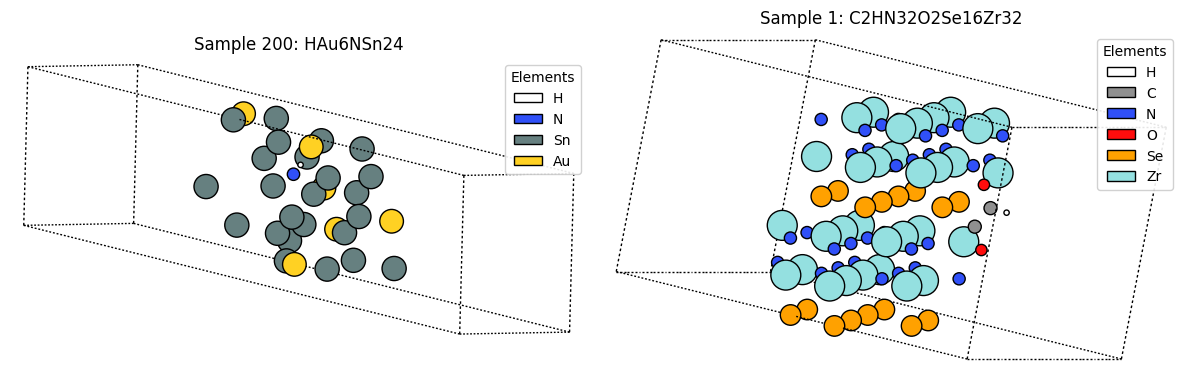

In [8]:
compare_samples(dataset_path, 200, 1)

* * *
## **EDA**

### **1.- Chemical & Distribution Analysis**

Here is where I understand what is being simulated, basically there are three aspects:
* *Elemental Diversity:* Visualize the frequency of metals in the catalysts versus elements in the adsorbates (H, C, N, O).
* *System Scaling:* Plot the distribution of natoms per system.
* *Tag distribution:* Calculate the ratio of Fixed (0) vs. Free (1, 2) atoms. This tells you how much of the system is actually "moving" during the simulated relaxation.


**Summary:** In this phase, I need to verify the diversity of the catalysts and adsorbates to understand the domain of the model. We will specifically look at the Atomic Number distributions, map them to chemical symbols, and analyze the Tag system (Adsorbate vs. Surface vs. Subsurface).

Analyzing 10000 systems...


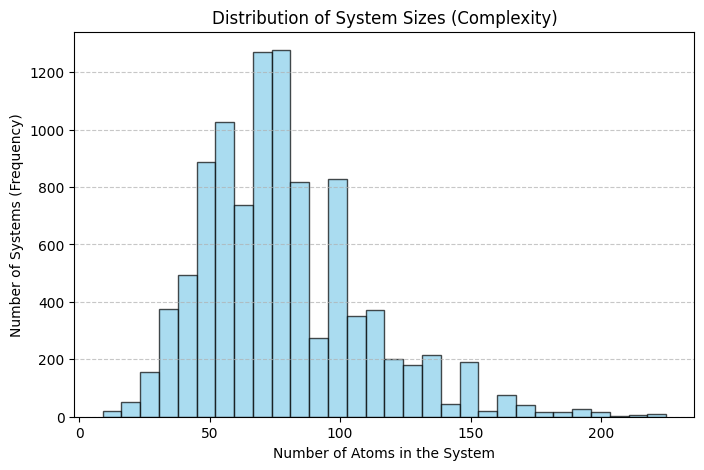

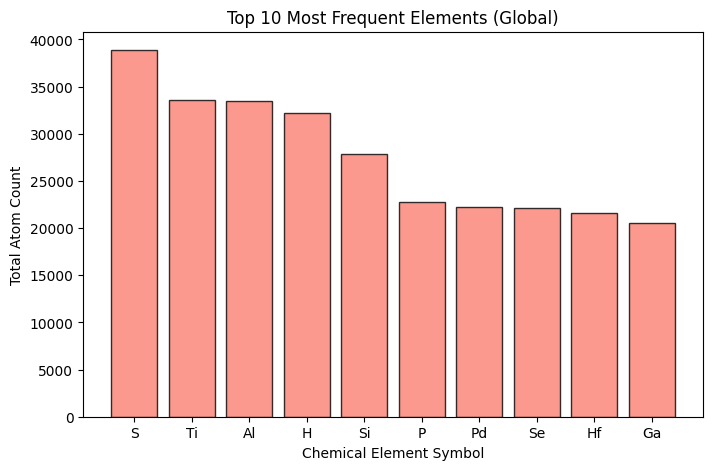

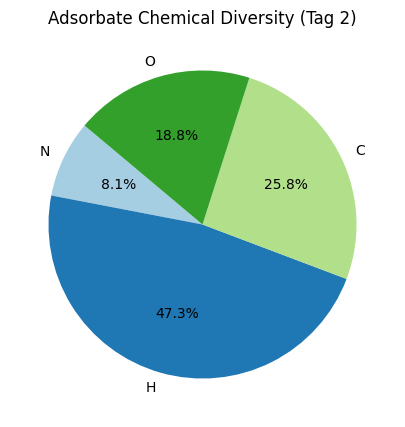

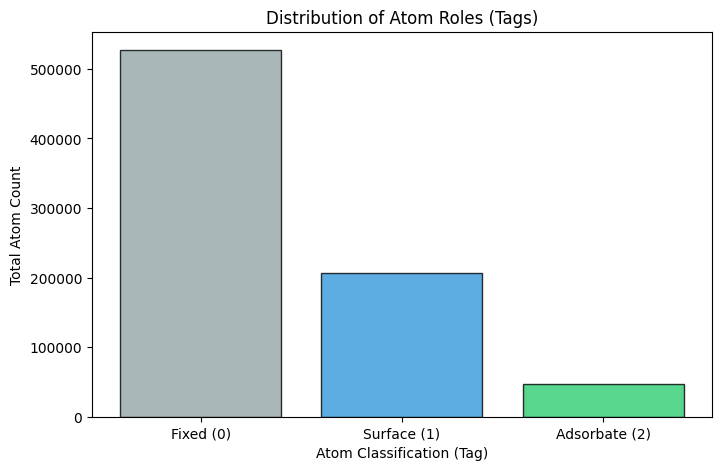


--- Summary ---
Elements Discovered: ['Ag', 'Al', 'As', 'Au', 'B', 'Bi', 'C', 'Ca', 'Cd', 'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Fe', 'Ga', 'Ge', 'H', 'Hf', 'Hg', 'In', 'Ir', 'K', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Ni', 'O', 'Os', 'P', 'Pb', 'Pd', 'Pt', 'Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Sc', 'Se', 'Si', 'Sn', 'Sr', 'Ta', 'Tc', 'Te', 'Ti', 'Tl', 'V', 'W', 'Y', 'Zn', 'Zr']
Vertical Axis Meaning:
 - System Sizes: Count of distinct catalyst+adsorbate systems.
 - Global Frequency: Absolute sum of atoms across all loaded systems.
 - Tag Distribution: Population of atoms categorized by their mobility (Fixed vs Free).


In [9]:
perform_chemical_eda(pt_tensor)

* * *
### **2.- Geometric & Graph Topology**

Since models like SchNet and DimeNet rely on distances and angles, I have to analyze the spatial relationships.

* Coordination & Edge Index: Use edge_index to calculate the average "degree" (number of neighbors) per atom.

* Distance Histograms: Plot the distribution of bond lengths. This helps I define the optimal cutoff radius for your GNN's neighbor search.

* PBC Analysis: Use cell and cell_offsets to visualize how many edges cross the periodic boundaries.

Calculating Geometric Properties for 10000 systems...


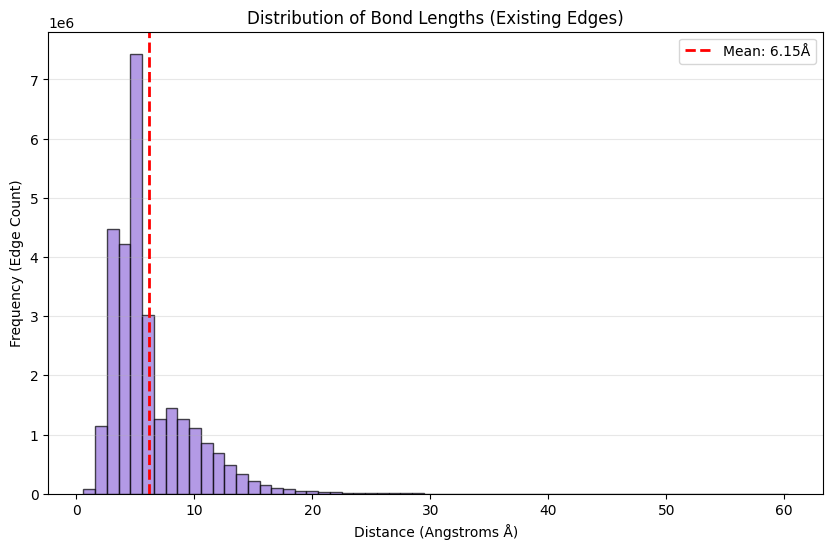

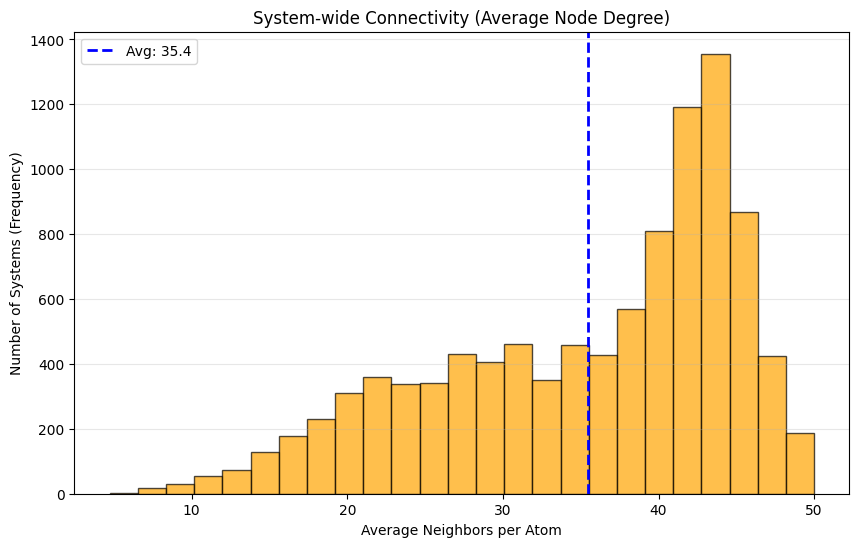


--- Geometric Summary ---
Total Edges Analyzed: 28613395
Global Mean Bond Length: 6.15 Å
Shortest Detected Bond: 0.60 Å
Longest Detected Bond: 60.32 Å
Global Average Neighbors: 35.45 per atom

--- Insights for Model Configuration ---
1. Cutoff Suggestion: Your longest edge is 60.32Å.
   If you set your model's cutoff below this value, you will lose connectivity
   already present in the dataset.
2. Graph Density: On average, each atom is connected to 35.4 others.
   High connectivity increases the number of message-passing operations.


In [10]:
perform_geometric_eda(pt_tensor)

### *Understand results*
They describe how the atoms are spaced and how dense the communication network is within each chemical system.
- *Graphic 1:* This chart tells you the physical distance between every pair of atoms that has an "edge" (a connection). The Vertical Axis is the *Edge Count*. It shows how many atom pairs in my dataset are separated by a specific distance.

- *Graphic 2:* This chart tells me how "crowded" or "dense" my graphs are. It measures the number of neighbors each atom has. The vertical axis tells me how many distict chemical structures have that average connectivity.


### *Summary*
**Computationally Expensive:** Because the average connectivity is 35.4, every time there is a "message passing" layer in mi model, each atom has to aggregate information from ~35 other nodes. This makes OCP models much more memory-intensive than models for simple molecules.

**Cutoff Sensitivity:** If I build a model and set the cutoff radius to 5.0Å, I will delete the majority of the connections shown in the first plot (since the mean is 6.15Å). This may lead to poor energy predictions because the model would be "blind" to long-range interactions that are present in the ground-truth data.

* * *
## 3.- Energy & Target Analysis

This analysis explores the relationship between the initial energy `y_init`, the target relaxed energy `y_relaxed`, and the resulting energy (`y_relaxed - y_init`). Understanding the distribution and scale of these values will help to decide which normalization strategies and evaluate the difficulty of the regression task my model will solve.

Extracting energy data from 10000 systems...


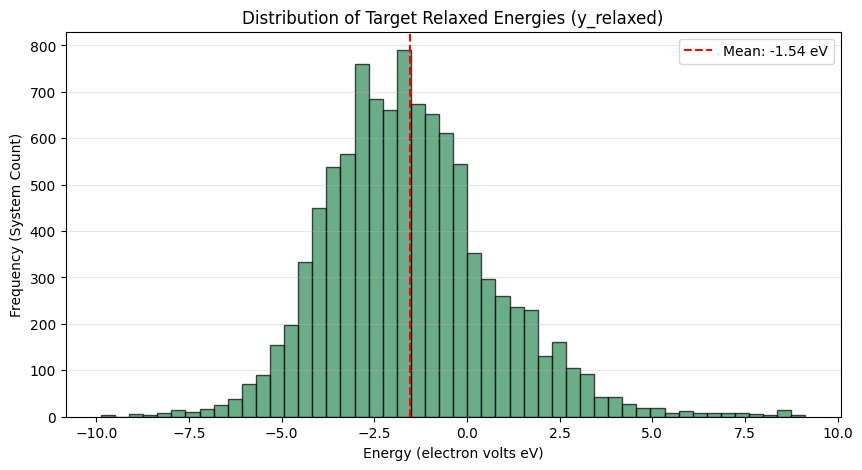

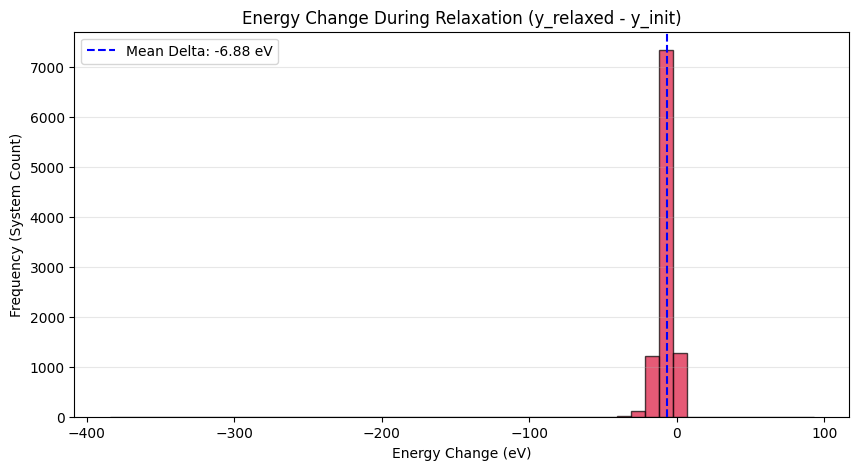

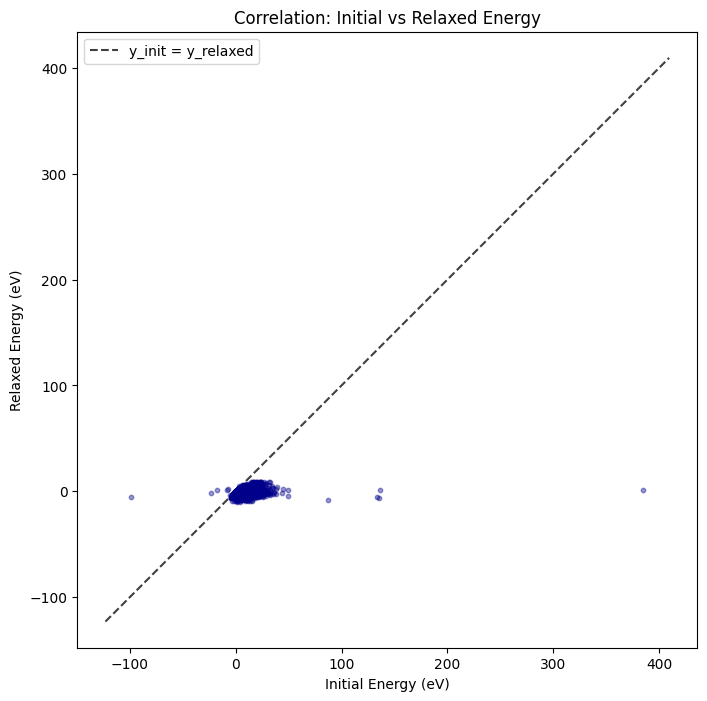


--- Energy EDA Summary ---
Total valid samples: 10000
Relaxed Energy Range: [-9.88, 9.13] eV
Avg Relaxation 'Drop': -6.8755 eV
Std Dev of Targets: 2.2782 eV

--- Model Training Insights ---
1. Target Scale: If your energy values are large (e.g., hundreds of eV),
   consider using 'Mean/Std Normalization' or 'Subtracting the mean' for the loss.
2. Delta Analysis: The mean delta shows how much 'information' is gained
   by the relaxation. If the delta is very small, the initial structure
   is already very close to the minimum.


In [11]:
perform_energy_eda(pt_tensor)

### *Understand results*
- Graph 01 (`y_relaxed`): Most chemical systems are between -5 and 2 eV. If my model starts predicting values like -50 or +50, I know something is wrong with my output scaling or normalization.
- Graph 02 (`y_relaxed - y_init`): This is physically correct, chemical systems should lose energy to reach a relaxed state. Most systems experience a similar magnitude of stabilization (~6-7eV).
- Graph 03 (`Corelation`): Most of the blue dots are under `y_init=x_relaxed` that confirms the energy drop. Blue dots that are to far from cero can be consider ourliers.

### *Summary:*
- Relaxed Energy Range [-9.88, 9.13] eV: This tells you the diversity of my targets. The range spans nearly 20 eV means your model should be sensitive to both highly stable (negative energy) and less stable (positive energy) configurations.

- Avg Relaxation 'Drop' (-6.88 eV): On average, the system's energy decreases by nearly 7 eV during the relaxation process. In physics, a lower energy state is a more stable state. This indicates that the "initial structures" in the dataset are often quite far from their equilibrium, and the model must learn the complex chemical relationship that leads to this stabilization.

- Std Dev of Targets (2.28 eV): This measures the "spread" of the data. Since the standard deviation is relatively high, it suggests that simple mean-guessing will lead to high errors. Your model needs to understand the specific catalyst-adsorbate interaction to make accurate predictions.

*The fact that the `Initial vs Relaxed energy` graph doesn't follow a simple linear trend means the relationship is non-linear and complex, so here is where I can use a Graph Neural Networks (GNNs).*



* * *
## 4.- Visual Inspection


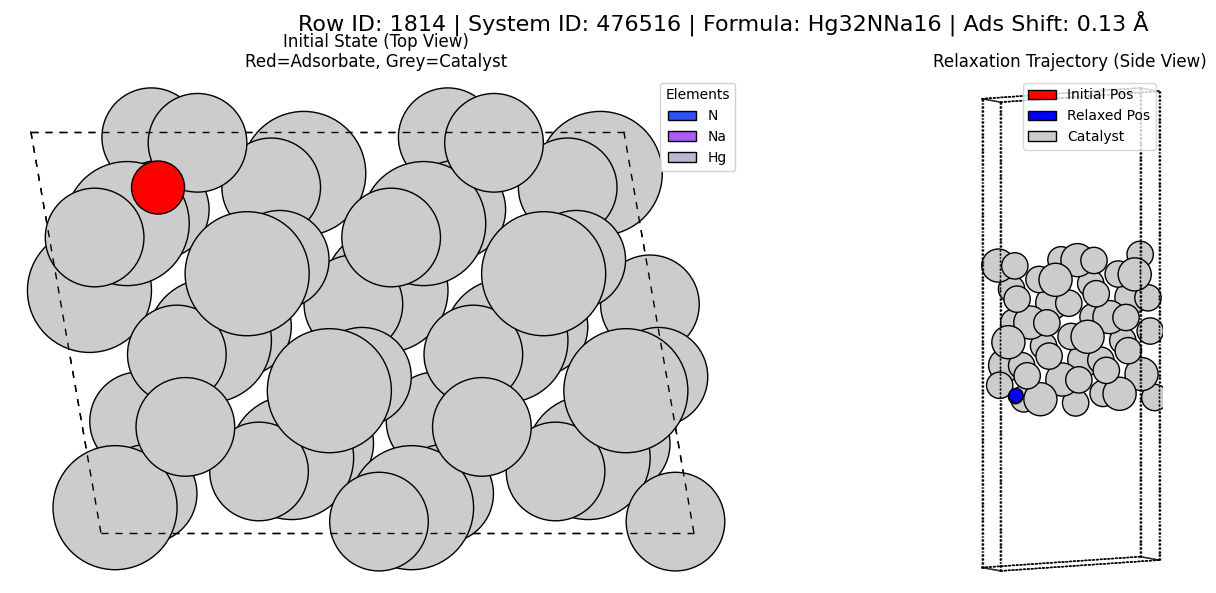

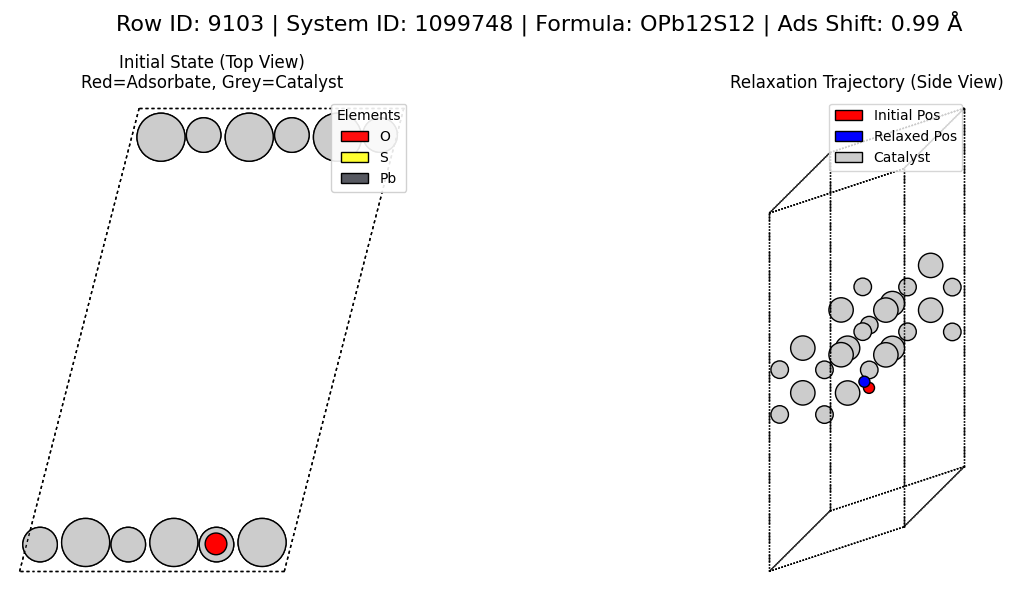

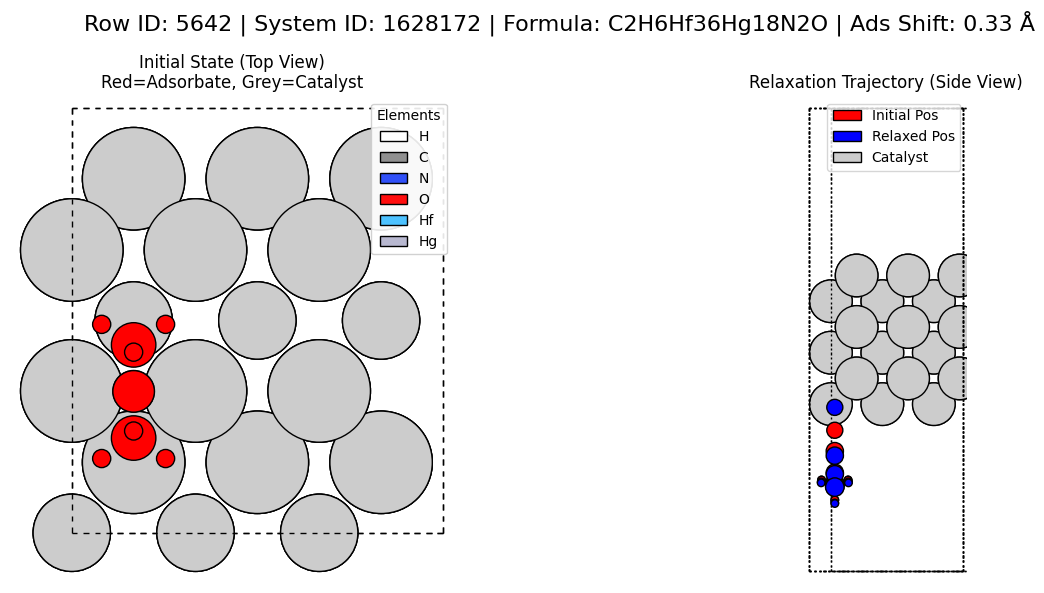

In [25]:
visualize_and_compare_relaxations(pt_tensor, 3)

In [26]:
visualize_interactive_relaxation(pt_tensor, 5642)

Interactive View for Sample 5642
Legend: Grey=Catalyst | Red(Transparent)=Initial Adsorbate | Blue=Relaxed Adsorbate | Yellow Line=Movement


3Dmol.js failed to load for some reason. Please check your browser console for error messages.